In [89]:
import paddle

In [90]:
from PIL import Image


image_path = '/home/luffy/final_menu/train_data/menu042.jpg' 
image = Image.open(image_path)


width, height = image.size

#放大尺寸
scale_factor = 2

new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

# 進行放大
resized_image = image.resize((new_width, new_height), Image.LANCZOS)

# 保存圖片
output_path = 'resize.jpg'  # 路徑
resized_image.save(output_path)

print(f"放大的圖片已經保存到 {output_path}")

放大的圖片已經保存到 resize.jpg


In [91]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr目前支持的多语言语种可以通过修改lang参数进行切换
# 例如`ch`, `en`, `fr`, `german`, `korean`, `japan`
model_1 = '/home/luffy/PaddleOCR/pretrain_models/iter_30/iter_epoch_30.pdparams'
model_2 = '/home/luffy/final_menu/iter_epoch_87.pdparams'
model_3 = '/home/luffy/final_menu/v4_best_rec'
ocr = PaddleOCR(use_angle_cls=True, rec_model=model_3)  # need to run only once to download and load model into memory
img_path = '/home/luffy/final_menu/resize.jpg'
result = ocr.ocr(img_path, cls=True)
#for idx in range(len(result)):
#    res = result[idx]
 #   for line in res:
#        print(line)

from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/home/luffy/final_menu/ppocr_img/fonts/chinese_cht.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result_2.jpg')
result


[2024/06/18 10:00:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/luffy/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/luffy/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_

[[[[319.0, 452.0], [562.0, 435.0], [568.0, 515.0], [324.0, 532.0]],
  ('乾面', 0.6532955765724182)],
 [[[794.0, 470.0], [845.0, 470.0], [845.0, 513.0], [794.0, 513.0]],
  ('小', 0.9999712705612183)],
 [[[931.0, 477.0], [999.0, 477.0], [999.0, 530.0], [931.0, 530.0]],
  ('大', 0.9968292117118835)],
 [[[1053.0, 477.0], [1111.0, 477.0], [1111.0, 513.0], [1053.0, 513.0]],
  ('加蛋', 0.9986069798469543)],
 [[[1170.0, 485.0], [1573.0, 515.0], [1568.0, 585.0], [1164.0, 555.0]],
  ('飯類、水鲛類', 0.7712469100952148)],
 [[[1053.0, 510.0], [1111.0, 510.0], [1111.0, 550.0], [1053.0, 550.0]],
  ('10元', 0.9989616274833679)],
 [[[1626.0, 533.0], [1674.0, 533.0], [1674.0, 577.0], [1626.0, 577.0]],
  ('小', 0.9999597072601318)],
 [[[320.0, 547.0], [629.0, 536.0], [632.0, 603.0], [322.0, 614.0]],
  ('肉燥乾', 0.9862850308418274)],
 [[[1762.0, 543.0], [1814.0, 543.0], [1814.0, 587.0], [1762.0, 587.0]],
  ('大', 0.6166819334030151)],
 [[[1868.0, 540.0], [1912.0, 540.0], [1912.0, 570.0], [1868.0, 570.0]],
  ('加蛋', 0.9552

In [92]:
import numpy as np
class BOX:
    def __init__(self,box):
        self.x = np.mean([cor[0] for cor in box] )
        self.y = np.mean([cor[1] for cor in box] )
        self.x_min = 0.5*(box[0][0]+box[3][0])
        self.x_max = 0.5*(box[1][0]+box[2][0])
        self.y_min = 0.5*(box[0][1]+box[1][1])
        self.y_max = 0.5*(box[2][1]+box[3][1])

In [93]:
def create_dict(data):
    dict = {'餐點':data[0],'價格':data[1]}
    return dict

In [94]:
class select:
    def __init__(self,x,y,num):
        self.x = x
        self.y = y
        self.num = num


0: 640x480 1 one, 54.0ms
Speed: 1.7ms preprocess, 54.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


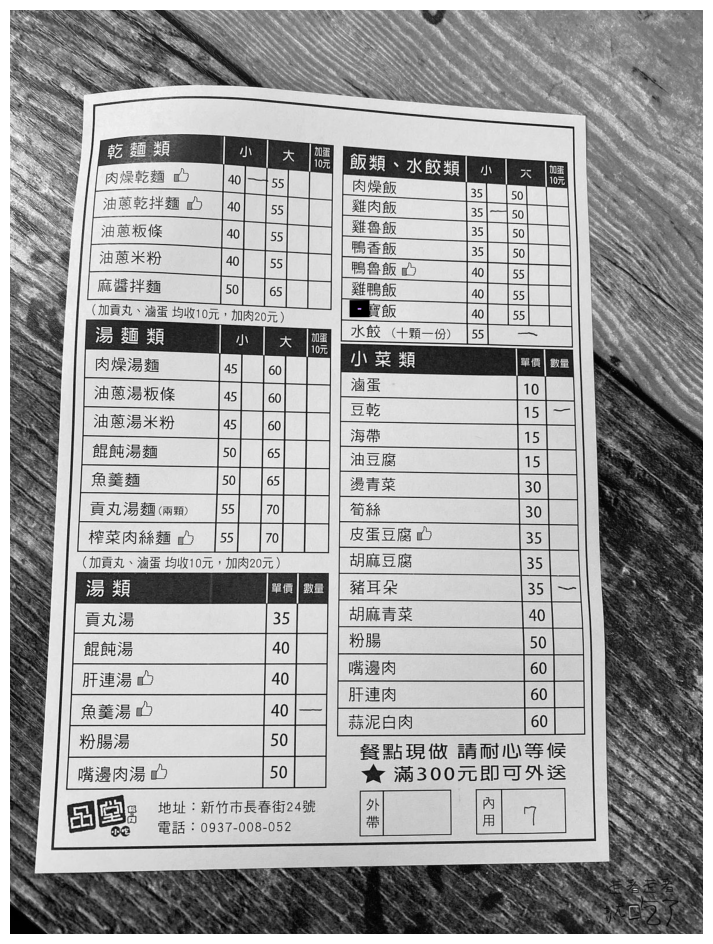

[0.0]


In [95]:
from det_num import det_num_of_menu
num_list, box_two_point_list = det_num_of_menu(image_path=img_path)
print(num_list)
sel_list = []           
for i,box_two_point in enumerate(box_two_point_list):
    sel_pos = (0.5*(box_two_point[0]+box_two_point[2]),0.5*(box_two_point[1]+box_two_point[3]))
    if num_list[i]==0:
        sel_num = 1
    elif num_list[i]==1:
        sel_num = 3
    elif num_list[i]==2:
        sel_num = 2
    elif num_list[i]==3:
        sel_num = 4
    else:
        sel_num = 5
    sel = select(sel_pos[0],sel_pos[1],sel_num)
    #保存所有selection
    sel_list.append(sel)
        
    
    


In [96]:
!pip list

DEPRECATION: Loading egg at /home/luffy/anaconda3/envs/paddleOCR/lib/python3.11/site-packages/huggingface_hub-0.23.4-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Package                Version
---------------------- --------------------
anyio                  4.4.0
astor                  0.8.1
asttokens              2.0.5
attrdict               2.0.1
Babel                  2.15.0
bce-python-sdk         0.9.14
beautifulsoup4         4.12.3
blinker                1.8.2
Brotli                 1.0.9
cachetools             5.3.3
certifi                2023.7.22
chardet                4.0.0
charset-normalizer     2.0.4
click                  8.1.7
coloredlogs            15.0.1
comm                   0.2.1
contourpy              1.2.1
cssselect              1.2.0
cssutils               2.11.1
cycler                 0.10.0
Cython          

In [97]:
all_inf = []
price_box_list = []
old_box = BOX([[0,0],[0,0],[0,0],[0,0]])
meal = ''
for inf in result:
    box = inf[0]
    new_box = BOX(box)
    if meal and new_box.y > old_box.y_max:
        #print(meal)
        meal = ''
    info = inf[1][0]
    length = len(info)
    #print(info)
    number = ''
    for i,c in enumerate(info):
        if c.isdigit():
            number += c
            #print(number)
            if i==length-1:
                d = create_dict([meal,number])
                price_box_list.append(new_box)
                all_inf.append(d)
                #print(meal,number)
                meal = ''
        else:
            if number:
                #print(meal,number)
                price = number
                d = create_dict([meal,number])
                price_box_list.append(old_box)
                all_inf.append(d)
                #print(price)
                meal = ''
                number = ''
            meal += c
    old_box = new_box
all_inf


[{'餐點': '飯類、水鲛類', '價格': '10'},
 {'餐點': '', '價格': '40'},
 {'餐點': '', '價格': '55'},
 {'餐點': '肉燥．', '價格': '10'},
 {'餐點': '', '價格': '35'},
 {'餐點': '', '價格': '5505050555'},
 {'餐點': '油葱乾拌麵', '價格': '40'},
 {'餐點': '雞肉飯', '價格': '55'},
 {'餐點': '', '價格': '35'},
 {'餐點': '雞鲁飯油葱叛條', '價格': '40'},
 {'餐點': '', '價格': '35'},
 {'餐點': '', '價格': '55'},
 {'餐點': '油葱米粉', '價格': '35'},
 {'餐點': '', '價格': '40'},
 {'餐點': '', '價格': '55'},
 {'餐點': '鲁', '價格': '40'},
 {'餐點': '麻醬拌面雞鴨飯', '價格': '50'},
 {'餐點': '', '價格': '65'},
 {'餐點': '', '價格': '40'},
 {'餐點': '（加貢丸丶蛋均收', '價格': '10'},
 {'餐點': '元，加肉', '價格': '20'},
 {'餐點': '元）三寶飯', '價格': '40'},
 {'餐點': '汤麵类水鲛 (十颗一份)', '價格': '55'},
 {'餐點': '', '價格': '10'},
 {'餐點': '小菜類肉燥湯麵單價數量', '價格': '45'},
 {'餐點': '', '價格': '60'},
 {'餐點': '蛋油葱湯叛條', '價格': '10'},
 {'餐點': '', '價格': '45'},
 {'餐點': ' ', '價格': '60'},
 {'餐點': '', '價格': '1515'},
 {'餐點': '油葱湯米粉', '價格': '45'},
 {'餐點': '', '價格': '60'},
 {'餐點': '饨湯麵', '價格': '50'},
 {'餐點': '', '價格': '65'},
 {'餐點': '', '價格': '15'},
 {'餐點': '魚羹麵', '價格': '50

In [98]:
for sel in sel_list:
    print(sel.num)

1


In [99]:
bill = 0
num_list = [0 for _ in range(len(price_box_list))]
for sel in sel_list:
    dis_min = 9999
    for i, price_box in enumerate(price_box_list):
        if price_box.y_min <= sel.y <= price_box.y_max and sel.x >= price_box.x_max:
            x_dis = sel.x - price_box.x_max
            if x_dis < dis_min:
                dis_min = x_dis
                idx = i
    num_list[idx] = sel.num
    bill += num_list[idx] * int(all_inf[idx]['價格'])

In [100]:
print(num_list)
for i,num in enumerate(num_list):
    all_inf[i]['數量'] = num

all_inf

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[{'餐點': '飯類、水鲛類', '價格': '10', '數量': 0},
 {'餐點': '', '價格': '40', '數量': 0},
 {'餐點': '', '價格': '55', '數量': 0},
 {'餐點': '肉燥．', '價格': '10', '數量': 0},
 {'餐點': '', '價格': '35', '數量': 0},
 {'餐點': '', '價格': '5505050555', '數量': 0},
 {'餐點': '油葱乾拌麵', '價格': '40', '數量': 0},
 {'餐點': '雞肉飯', '價格': '55', '數量': 0},
 {'餐點': '', '價格': '35', '數量': 0},
 {'餐點': '雞鲁飯油葱叛條', '價格': '40', '數量': 0},
 {'餐點': '', '價格': '35', '數量': 0},
 {'餐點': '', '價格': '55', '數量': 0},
 {'餐點': '油葱米粉', '價格': '35', '數量': 0},
 {'餐點': '', '價格': '40', '數量': 0},
 {'餐點': '', '價格': '55', '數量': 0},
 {'餐點': '鲁', '價格': '40', '數量': 0},
 {'餐點': '麻醬拌面雞鴨飯', '價格': '50', '數量': 0},
 {'餐點': '', '價格': '65', '數量': 0},
 {'餐點': '', '價格': '40', '數量': 0},
 {'餐點': '（加貢丸丶蛋均收', '價格': '10', '數量': 0},
 {'餐點': '元，加肉', '價格': '20', '數量': 0},
 {'餐點': '元）三寶飯', '價格': '40', '數量': 0},
 {'餐點': '汤麵类水鲛 (十颗一份)', '價格': '55', '數量': 0},
 {'餐點': '', '價格': '10', '數量': 0},
 {'餐點': '小菜類肉燥湯麵單價數量', '價格': '45', '數量': 0},
 {'餐點': '', '價格': '60', '數量': 0},
 {'餐點': '蛋油葱湯叛條', '價格': '10', '數

In [101]:
print(bill)

30
